# **Autor: Naren Castellon**

# **Introducción a Machine Learning**

**Machine learning** está en todas partes. Cuando reserva un billete de avión, un algoritmo decide el precio que vas a pagar por ello. Cuando solicita un préstamo, el aprendizaje automático puede decidir ya sea que lo consigas o no. Cuando se desplaza por la línea de tiempo de Facebook, elige qué anuncios mostrarle. El aprendizaje automático también juega un papel importante en su
Resultados de búsqueda de Google. Organiza la bandeja de entrada de su correo electrónico y filtra el spam, pasa por su currículum vitae ante los reclutadores cuando solicita un trabajo y, más recientemente, también ha comenzó a desempeñar el papel de su asistente personal en forma de Siri y otros virtuales asistentes.

En está sección, aprenderemos sobre la teoría y la práctica del aprendizaje automático. Lo haremos comprender cuándo y cómo aplicarlo. Para comenzar, veremos un nivel alto Introducción a cómo funciona el aprendizaje automático. Entonces podrá diferenciar entre los diferentes paradigmas del aprendizaje automático y saber cuándo utilizar cada uno de ellos. Entonces, y ser llevados a través del ciclo de vida del desarrollo del modelo y los diferentes pasos que toman los profesionales resolver problemas. Finalmente, le presentaremos `scikit-learn` y aprenderemos por qué es el de herramienta más importante para muchos profesionales.



### **Descripción de datos**

**Variable	Definición**


* Gender:	Género del cliente
* Age:	Edad del cliente
* Driving_License: Licencia de conducir	0: el cliente no tiene DL, 1: el cliente ya tiene DL
* Region_code: Código de región	Código único para la región del cliente.
* Previously_Insured: Previamente_asegurado	1: el cliente ya tiene seguro de vehículo, 0: el cliente no tiene seguro de vehículo
* Vehicle_Age:	Antigüedad del vehículo
* Vehicle_Damage	1: El cliente sufrió daños en su vehículo en el pasado. 0: El cliente no ha dañado su vehículo en el pasado.
* Annual_Premium: Prima anual,	La cantidad que el cliente debe pagar como prima en el año.
* Policy_Sales_Channel: Política de Ventas Canal	Código anónimo para el canal de acercamiento al cliente, es decir. Diferentes agentes, por correo, por teléfono, en persona, etc.
* Vintage: Clásico,	Número de días que el cliente ha estado asociado con la empresa
* Response: Respuesta

## **Planteamiento del problema:**
La compañía de seguros que brinda seguro médico a sus clientes ahora planea brindar un seguro para vehículos. La empresa quiere saber cuántos de sus clientes estarían interesados en seguros de vehículos.

La compañía quiere predecir la prima anual de cada uno de sus clientes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Manipulación y tratamiento de Datos
import numpy as np
import pandas as pd
#Visualización de Datos
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Procesamiento de Datos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# No presentar advertencia
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Curso de ML 3 version/Sesión N° 02/insurance.csv", sep=";")
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,42,1,8,0,1-2 Year,Yes,47083,152,78,0
1,Male,29,1,29,1,< 1 Year,No,33317,152,137,0
2,Male,23,1,37,1,< 1 Year,No,28622,152,170,0
3,Female,77,1,26,1,1-2 Year,No,30590,26,30,0
4,Female,25,1,11,1,< 1 Year,No,26891,152,171,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,152444.0,38.798451,15.522779,20.0,25.0,36.0,49.0,85.0
Driving_License,152444.0,0.997993,0.044758,0.0,1.0,1.0,1.0,1.0
Region_Code,152444.0,26.422312,13.215284,0.0,15.0,28.0,35.0,52.0
Previously_Insured,152444.0,0.458398,0.498268,0.0,0.0,0.0,1.0,1.0
Annual_Premium,152444.0,30487.510227,17090.058807,2630.0,24379.0,31634.0,39339.0,540165.0
Policy_Sales_Channel,152444.0,111.984440,54.257006,1.0,29.0,136.0,152.0,163.0
Vintage,152444.0,154.275386,83.646248,10.0,82.0,154.0,227.0,299.0
Response,152444.0,0.121533,0.326747,0.0,0.0,0.0,0.0,1.0


## **EDA**

In [ ]:
#Revisar la cantidad filas y el número de variables 
df.shape

(152444, 11)

In [ ]:
## Revisando si tenemos valores pérdidos
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
#Revisando los tipos de variables 
#object= Variables categoricas

df.dtypes

Gender                  object
Age                      int64
Driving_License          int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
Response                 int64
dtype: object

In [ ]:
## Dividiendo las variables en categoricas y numericas
numerical_columns = ["Age","Driving_License","Region_Code",'Previously_Insured', "Annual_Premium", "Policy_Sales_Channel", "Vintage","Response"]
categorical_columns = ["Gender", 'Vehicle_Age', 'Vehicle_Damage']

    count  percent
0  133917     87.8
1   18527     12.2


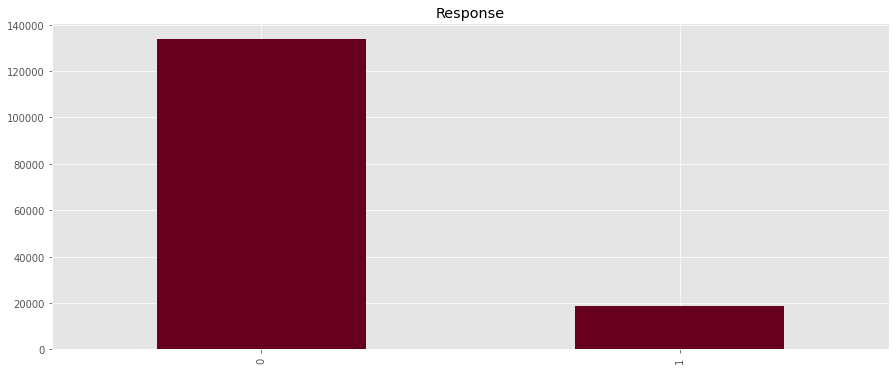

In [ ]:
### Comprobando si los datos están sesgados. 
plt.figure(figsize=(15, 6))
feature = numerical_columns[7]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
a1 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(a1)
count.plot(kind='bar', title=feature, grid=bool, cmap="RdBu" );

Como podemos ver los datos de la variable **Response** no están balanceado,Para el caso cuando trabajemos con Modelo de Supervised Learning para clasificación debemos balancear nuestro datos.

**Participación del Genero**

        count  percent
Male    82282     54.0
Female  70162     46.0


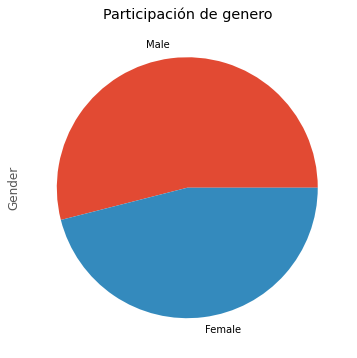

In [ ]:
plt.figure(figsize=(15, 6))
count = df["Gender"].value_counts()
percent = 100*df["Gender"].value_counts(normalize=True)
a1= pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(a1)
count.plot(kind='pie', title="Participación de genero");

**Distribución de género basada en la response**

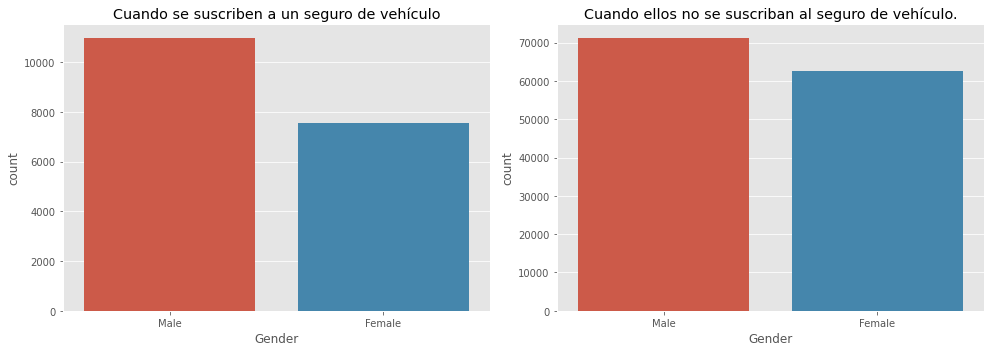

In [ ]:
### Gender distribution based on response
fig, axis = plt.subplots(1, 2, figsize = (14, 5))

sns.countplot(ax = axis[0], x = df[df["Response"] == 1]["Gender"])
axis[0].set_title("Cuando se suscriben a un seguro de vehículo")

sns.countplot(ax = axis[1], x =df[df["Response"] == 0]["Gender"])
axis[1].set_title("Cuando ellos no se suscriban al seguro de vehículo.")

fig.tight_layout()

De lo anterior podemos ver que los hombres tienden a suscribirse al seguro de vehículos más que las mujeres. Por lo tanto, podemos asumir que el género juega un papel importante en la construcción de modelos.

**Analizando el permiso de conducir**

   Gender  Driving_License
0  Female            70162
1    Male            82282


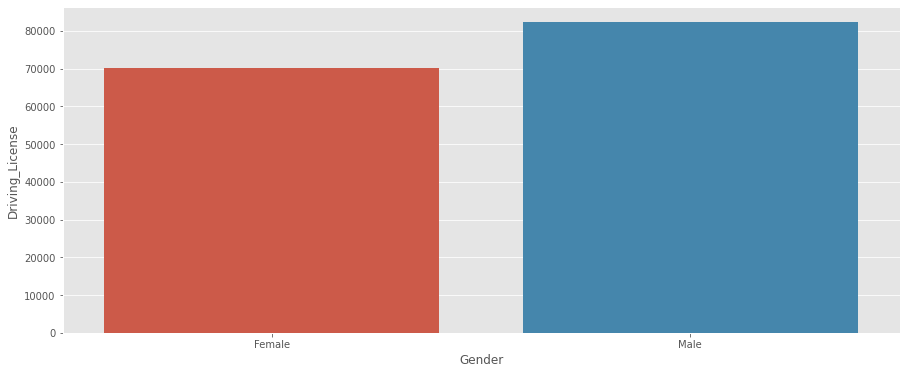

In [ ]:
### Analizando el permiso de conducir
plt.figure(figsize=(15, 6))
a2= df.groupby(["Gender"]).count()["Driving_License"].to_frame().reset_index()
print(a2)
sns.barplot(x = a2["Gender"], y = a2["Driving_License"]);

**Cliente previamente asegurado**

   count  percent
0  82564     54.2
1  69880     45.8


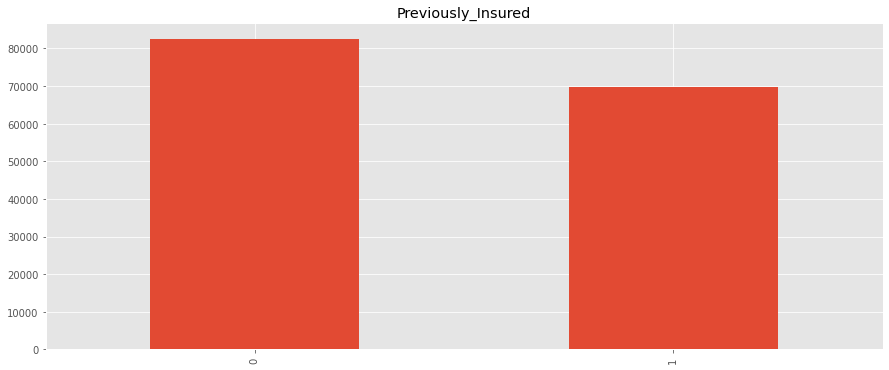

In [ ]:
plt.figure(figsize=(15, 6))
feature = numerical_columns[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
a3 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(a3)
count.plot(kind='bar', title=feature);

**Análisis de la antigüedad del vehículo**

           count  percent
1-2 Year   80069     52.5
< 1 Year   66044     43.3
> 2 Years   6331      4.2


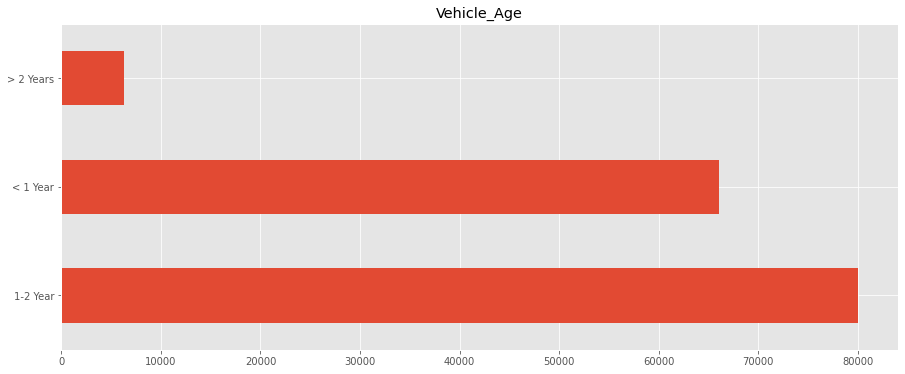

In [ ]:
plt.figure(figsize=(15, 6))
feature = categorical_columns[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
a4 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(a4)
count.plot(kind='barh', title=feature);

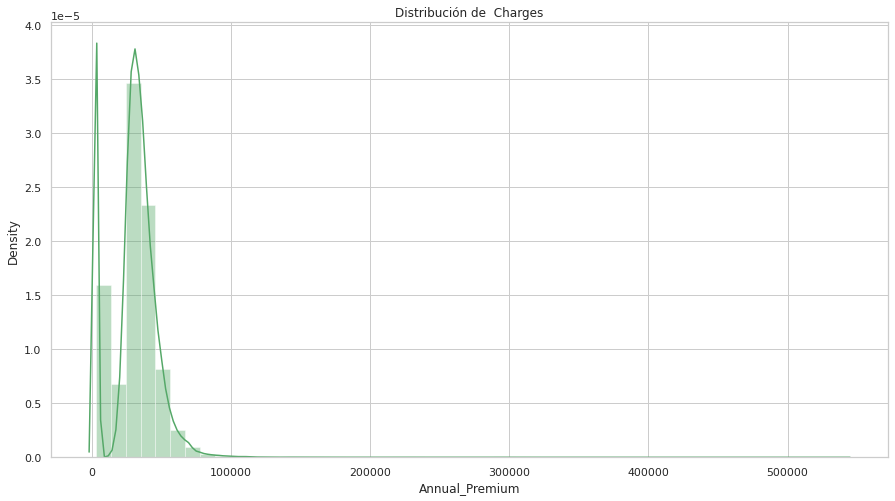

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(15, 8))
ax = sns.distplot(df['Annual_Premium'], kde = True, color = 'g')
plt.title('Distribución de  Charges');

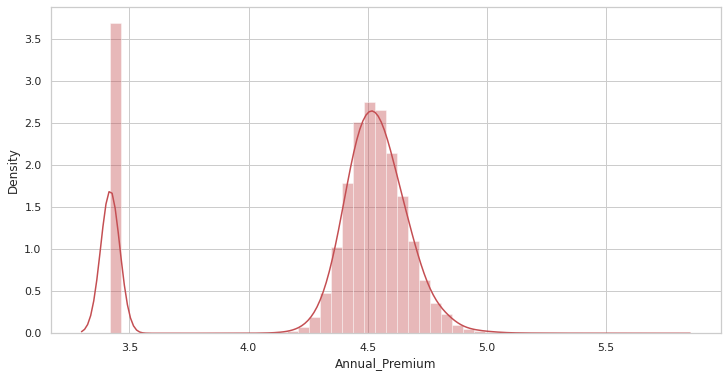

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 6));
ax = sns.distplot(np.log10(df["Annual_Premium"]), kde = True, color = 'r' );

**Distribuciones de factores**

La distribución de factores es relevante para la comprensión real de los datos subyacentes. Los actuarios también tienden a ajustarse a distribuciones estadísticas.

In [ ]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,42,1,8,0,1-2 Year,Yes,47083,152,78,0
1,Male,29,1,29,1,< 1 Year,No,33317,152,137,0
2,Male,23,1,37,1,< 1 Year,No,28622,152,170,0
3,Female,77,1,26,1,1-2 Year,No,30590,26,30,0
4,Female,25,1,11,1,< 1 Year,No,26891,152,171,0


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
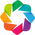

:Layout
   .Distribution.Age                  :Distribution   [Age]   (Density)
   .Distribution.Region_Code          :Distribution   [Region_Code]   (Density)
   .Distribution.Annual_Premium       :Distribution   [Annual_Premium]   (Density)
   .Distribution.Policy_Sales_Channel :Distribution   [Policy_Sales_Channel]   (Density)
   .Distribution.Vintage              :Distribution   [Vintage]   (Density)

In [ ]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

age = hv.Distribution(df['Age'],label="Age").opts(color="red")
reg = hv.Distribution(df['Region_Code'],label="Region_Code").opts(color="green")
prem = hv.Distribution(df['Annual_Premium'],label="Annual_Premium").opts(color="yellow")
chan = hv.Distribution(df['Policy_Sales_Channel'],label="Policy_Sales_Channel").opts(color="blue")
#vehage = hv.Distribution(df['Vehicle_Age'],label="Vehicle_Age").opts(color="purple")
vin = hv.Distribution(df['Vintage'],label="Vintage").opts(color="pink")
#+ 
(age + reg +prem + chan +  vin ).opts(opts.Distribution(xlabel="Values", ylabel="Density", width=400, height=300,tools=['hover'],show_grid=True)).cols(3)

### **1.1  División de datos en funciones y etiquetas**

Como primer paso, dividimos los datos en conjuntos de características y etiquetas. Nuestro conjunto de etiquetas consta de valores de la columna "propina", mientras que el conjunto de características consta de valores de las columnas restantes. El siguiente script divide los datos en conjuntos de características y etiquetas.

In [ ]:
  X = df.drop(["Annual_Premium"], axis=1)
  y = df["Annual_Premium"]#Target o objetivo

Imprimamos el conjunto de funciones.

In [ ]:
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response
0,Male,42,1,8,0,1-2 Year,Yes,152,78,0
1,Male,29,1,29,1,< 1 Year,No,152,137,0
2,Male,23,1,37,1,< 1 Year,No,152,170,0
3,Female,77,1,26,1,1-2 Year,No,26,30,0
4,Female,25,1,11,1,< 1 Year,No,152,171,0


In [ ]:
X.shape

(152444, 10)

Y el siguiente script imprime el conjunto de etiquetas.

In [ ]:
y.head()

0    47083
1    33317
2    28622
3    30590
4    26891
Name: Annual_Premium, dtype: int64

### **1.2. Conversión de datos categóricos en números**

Los algoritmos de aprendizaje automático, en su mayor parte, solo pueden funcionar con números. Por lo tanto, es importante convertir los datos categóricos a un formato numérico.

En este sentido, el primer paso es crear un conjunto de datos de todos los valores numéricos. Para hacerlo, elimine las columnas categóricas del conjunto de datos, como se muestra a continuación.

In [ ]:
print("Los valores únicos del año del vehiculo",df.Vehicle_Age.unique())
print("Los valores únicos del genero",df.Gender.unique())
print("Los valores únicos del genero",df.Vehicle_Damage.unique())

Los valores únicos del año del vehiculo ['1-2 Year' '< 1 Year' '> 2 Years']
Los valores únicos del genero ['Male' 'Female']
Los valores únicos del genero ['Yes' 'No']


In [ ]:
gender_map= {'Male':0,'Female':1}
vehicle_age_map= {'< 1 Year':0,'1-2 Year':1,'> 2 Years':2}
vehicle_damage_map= {'Yes':1,'No':0}

X['Gender']= X['Gender'].map(gender_map)
X['Vehicle_Age']= X['Vehicle_Age'].map(vehicle_age_map)
X['Vehicle_Damage']= X['Vehicle_Damage'].map(vehicle_damage_map)

X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response
0,0,42,1,8,0,1,1,152,78,0
1,0,29,1,29,1,0,0,152,137,0
2,0,23,1,37,1,0,0,152,170,0
3,1,77,1,26,1,1,0,26,30,0
4,1,25,1,11,1,0,0,152,171,0


### **1.3. Divida los datos en conjuntos de prueba y entrenamiento**

Después de entrenar un algoritmo de aprendizaje automático, debe evaluarlo para ver qué tan bien funciona con datos invisibles. Por lo tanto, dividimos el conjunto de datos en dos conjuntos, es decir, un conjunto de entrenamiento y un conjunto de prueba. El conjunto de datos se entrena a través del conjunto de entrenamiento y se evalúa en el conjunto de prueba. Para dividir los datos en conjuntos de entrenamiento y prueba, puede usar la función `train_test_split ()` de la biblioteca Sklearn, como se muestra a continuación. El seguimiento El script divide los datos en un conjunto de entrenamiento del 80 por ciento y un conjunto de prueba del 20 por ciento.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2021)

In [ ]:
print("Datos originales",X.shape)
print("Datos para el entrenamiento",X_train.shape)
print("Datos para prueba",X_test.shape)
print(y_train.shape)
print(y_test.shape)

Datos originales (152444, 10)
Datos para el entrenamiento (121955, 10)
Datos para prueba (30489, 10)
(121955,)
(30489,)


In [ ]:
X_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response
133413,1,49,1,29,1,1,1,26,170,0
129665,0,23,1,46,1,0,0,152,71,0
122083,1,59,1,19,1,1,0,152,85,0
105249,0,22,1,35,1,0,0,152,24,0
100444,0,40,1,37,0,1,1,26,109,0


### **1.4. Escalado / normalización de datos**

El paso final (opcional) antes de que los datos se pasen a los algoritmos de aprendizaje automático es escalar los datos. Puede ver que algunas columnas del conjunto de datos contienen valores pequeños, mientras que otras contienen valores muy grandes. Es mejor convertir todos los valores a una escala uniforme. Para hacerlo, puede usar la función `StandardScaler ()` del módulo `sklearn.preprocessing`, como se muestra a continuación:

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform (X_test)

### Feature Engineering

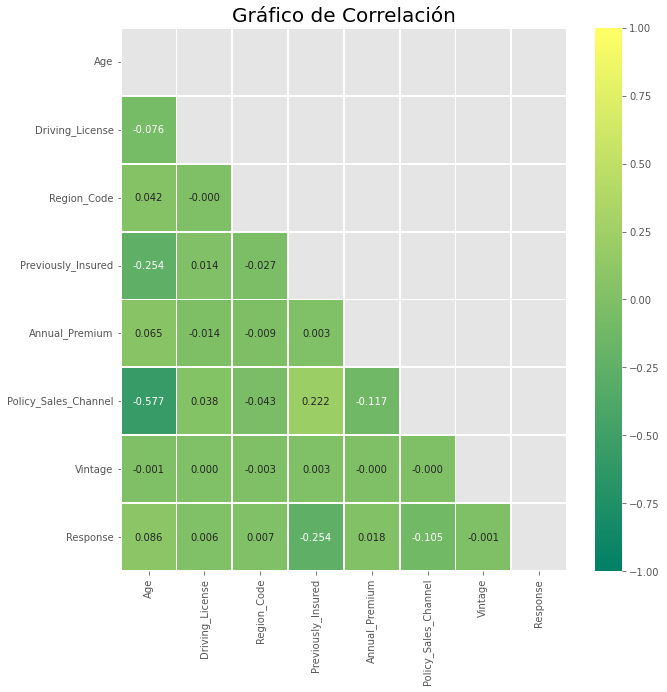

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

plt.figure(figsize = (10,10))
plt.title("Gráfico de Correlación", size=20)
sns.heatmap(df.corr(),annot=True, fmt=".3f",
            vmin=-1, vmax=1, linewidth = 1,
            center=0, mask=mask,cmap="summer");

La más relevante es la relación entre "Respuesta" y el resto de variables. En este caso veo alguna correlación entre Respuesta y "Vehicle_Damage", además hay una relación negativa con la variable binaria "Previously_Insured". Otras relaciones interesantes:
* la edad está fuertemente correlacionada con la edad del automóvil. Es bien sabido en la relación actuarial mundial que los jóvenes conducen automóviles viejos
* edad con canal de ventas, las personas mayores tienden a usar corredores y agentes, los jóvenes usan Internet
* previamente asegurado se correlaciona con la edad y la edad del vehículo. Los jóvenes tienden a cambiar de aseguradora a menudo
* previamente asegurado con daños en el vehículo, de hecho, muchos titulares de polos cambian de asegurador mientras corren un gran riesgo
* ** Antigüedad del vehículo y canal de venta de pólizas: este es un efecto espurio interesante. El efecto subyacente real es la relación entre la edad y el canal de ventas, lo que influye indirectamente en las cifras de la antigüedad del vehículo **

En el gráfico anterior podemos ver la correlación entre cada característica. Si dos características están altamente correlacionadas, podemos eliminar una de ellas porque tienden a sobreajustarse a los datos y también debemos asegurarnos de considerar todas las características que están altamente correlacionadas con la salida para que ayuden a una mejor predicción.

Hemos convertido los datos a un formato que se puede utilizar para entrenar algoritmos de aprendizaje automático para la regresión desde la biblioteca de `Sklearn`. Los detalles, incluidas las funcionalidades y el uso de todos los algoritmos de aprendizaje automático, están disponibles en este enlace. Puede verificar todos los algoritmos de regresión yendo a ese enlace.


##  **3. Modelo KNN para Regresión**

El KNN significa K-vecinos más cercanos. KNN es un algoritmo de aprendizaje automatico, que se basa en encontrar la distancia euclidiana entre diferentes puntos de datos.

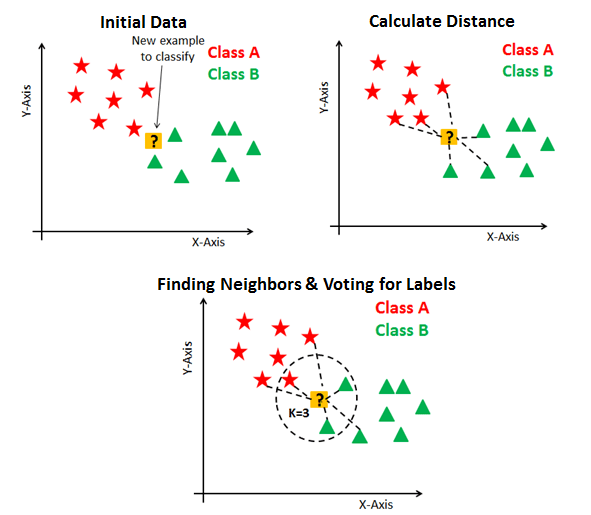

In [ ]:
#@title Algoritmo KNN
from IPython.display import Image
Image("/content/drive/MyDrive/imagenes/knn.png")

**Los pasos que se siguen en k-vecino más cercano son los siguientes:**
1. Recibimos el conjunto de datos sin procesar y sin clasificar que hay que trabajar.
2. Elegimos una matriz de distancias de la euclidiana, Manhattan o Minkowski.
3. Luego calcule la distancia entre los nuevos datos puntos y los puntos de datos de entrenamiento clasificados conocidos.
4. El número de vecinos a considerar es definida por el valor de “k”.
5. Se sigue comparando con la lista de clases. que tienen la distancia más corta y cuentan las número de veces que aparece cada clase.
6. La clase con la mayor cantidad de votos gana. Esto significa que la clase que tiene la frecuencia más alta y ha aparecido el mayor número de veces es asignado al punto de datos desconocido.

**Métodos de cálculo de la distancia entre puntos**
El primer paso es calcular la distancia entre el nuevo punto y cada punto de entrenamiento. Existen varios métodos para calcular esta distancia, de los cuales los métodos más comúnmente conocidos son: euclidiano, Manhattan (para continuo) y distancia de Hamming (para categórico).

1. Distancia euclidiana: probablemente la forma más común y sencilla de calcular entre dos puntos. Es raíz cuadrada de la suma de los cuadrados de las distancias:
$$Euclidean=\sqrt{(y_2-y_1)^2+(x_2-x_1)^2} $$

2. **Distancia de Manhattan:** La distancia entre dos puntos medida a lo largo de ejes en ángulo recto. A veces también se le conoce como distancia de cuadra de la ciudad. En un plano con $p_1$ en $(x_1, y_1)$ y $p_2$ en $(x_2, y_2)$, es

$$Manhattan=|x_1-x_2|+|y_1-y_2| $$

3. **Distancia de Minkowski:** Esta es una métrica en un espacio vectorial normado. La distancia de Minkowski se utiliza para la similitud de distancia de los vectores. Dados dos o más vectores, encuentre la similitud de distancia de estos vectores. Principalmente, la distancia de Minkowski se aplica en ML para averiguar la similitud de la distancia. Es una métrica de distancia generalizada y se puede representar mediante la siguiente fórmula:

$$Minkowski={(\sum_{i=1}^{n}|x_i-y_i|^p )^{1/p} } $$

donde usando diferentes valores de p podemos obtener diferentes valores de distancias. Con el valor de $p = 1$ tenemos obtener la distancia de Manhattan, con $p = 2$ obtenemos euclidiana distancia, y con $p= ∞$ obtenemos la distancia de Chebychev.

4. **Coseno Semejanza:** Es una medida de semejanza entre dos vectores distintos de cero de un producto interno espacio que mide el coseno del ángulo entre ellos. El coseno de 0° es 1, y es menor que 1 para cualquier ángulo en el intervalo $(0,π]$ radianes.

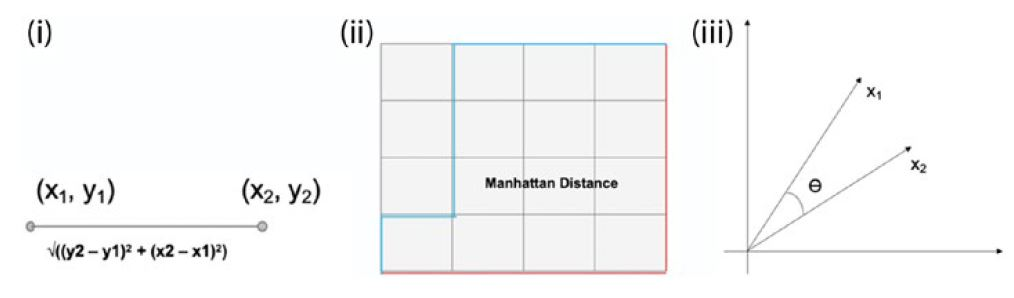

In [ ]:
#@title *(i) Euclidean distance; (ii) Manhattan distance; (iii) cosine similarity**
from IPython.display import Image
Image("/content/drive/MyDrive/Curso de ML 3 version/Sesión N° 03/imagen/distancia.JPG")

**¿Por qué utilizar el algoritmo KNN?**

El algoritmo KNN es particularmente útil cuando:

1. El algoritmo KNN no asume ninguna relación entre las características.
2. Útil para un conjunto de datos donde la localización de datos es importante.
3. Solo tienes que sintonizar el parámetro K, que es el número de vecino más cercano
4. No se necesita entrenamiento, ya que es un algoritmo de aprendizaje perezoso.
5. Sistemas de recomendación y búsqueda de similitudes semánticas entre las principales aplicaciones del algoritmo KNN.

**Desventajas del algoritmo KNN**

Las siguientes son las desventajas del algoritmo KNN.
1. Tiene que encontrar el valor óptimo de K, lo cual no es fácil.
2. No apto para datos de dimensiones muy elevadas.

### **3.1. Preparación de datos para problemas de regresión.**

Los algoritmos de aprendizaje automático requieren que los datos estén en un formato determinado antes de que los algoritmos puedan entrenarse con los datos. En esta sección, verá varios pasos de preprocesamiento de datos que debe realizar antes de poder entrenar algoritmos de aprendizaje automático utilizando la biblioteca `Sklearn`.

Para leer un conjunto de datos en particular en el marco de datos de Pandas

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Curso de ML 3 version/Sesión N° 02/insurance.csv", sep=";")
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,42,1,8,0,1-2 Year,Yes,47083,152,78,0
1,Male,29,1,29,1,< 1 Year,No,33317,152,137,0
2,Male,23,1,37,1,< 1 Year,No,28622,152,170,0
3,Female,77,1,26,1,1-2 Year,No,30590,26,30,0
4,Female,25,1,11,1,< 1 Year,No,26891,152,171,0


### **3.2  División de datos en funciones y etiquetas**

Como primer paso, dividimos los datos en conjuntos de características y etiquetas. Nuestro conjunto de etiquetas consta de valores de la columna "propina", mientras que el conjunto de características consta de valores de las columnas restantes. El siguiente script divide los datos en conjuntos de características y etiquetas.

In [ ]:
nuevo=df.sample(frac=0.7)

In [ ]:
X = nuevo.drop(["Annual_Premium"], axis=1)
y = nuevo["Annual_Premium"]
#visualizamos los datos
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response
131603,Female,29,1,28,0,< 1 Year,Yes,152,184,0
99240,Male,37,1,46,0,1-2 Year,Yes,11,16,0
105898,Male,23,1,37,0,< 1 Year,No,152,73,0
28112,Female,25,1,3,1,< 1 Year,No,152,90,0
94106,Male,27,1,50,1,< 1 Year,No,152,81,0


Y el siguiente script imprime el conjunto de etiquetas.

In [ ]:
y.head()

0    47083
1    33317
2    28622
3    30590
4    26891
Name: Annual_Premium, dtype: int64

### **3.3. Conversión de datos categóricos en números**

Los algoritmos de aprendizaje automático, en su mayor parte, solo pueden funcionar con números. Por lo tanto, es importante convertir los datos categóricos a un formato numérico.

En este sentido, el primer paso es crear un conjunto de datos de todos los valores numéricos. Para hacerlo, elimine las columnas categóricas del conjunto de datos, como se muestra a continuación.

In [ ]:
#Eliminamos las variables categoricas
numerical = X.drop(["Gender", 'Vehicle_Age', 'Vehicle_Damage' ], axis = 1)

El resultado a continuación muestra que el marco de datos "numérico" contiene sólo columnas numéricas.

In [ ]:
#Solo tenemos las variables numéricas
numerical.head()

,Age,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Vintage,Response
128925,74,1,15,0,124,264,0
22159,23,1,36,0,152,254,0
98400,28,1,28,0,124,36,0
51732,22,1,8,0,152,84,0
41789,59,1,28,1,124,31,1


A continuación, debe crear un marco de datos que contenga solo columnas categóricas.

In [ ]:
#Guardamos las variables categorica en una variable que se llama categorica
categorical = X.filter(["Gender", 'Vehicle_Age', 'Vehicle_Damage' ])
categorical.head()

,Gender,Vehicle_Age,Vehicle_Damage
131603,Female,< 1 Year,Yes
99240,Male,1-2 Year,Yes
105898,Male,< 1 Year,No
28112,Female,< 1 Year,No
94106,Male,< 1 Year,No


Uno de los enfoques más comunes para convertir una columna categórica en una numérica es mediante la codificación **one-hot**. En la codificación one-hot, para cada valor único en las columnas originales, se crea una nueva columna. Por ejemplo, para el sexo, se crean dos columnas: Femenino y Masculino. Si la columna de sexo original contenía hombre, se agrega un 1 en la columna Hombre recién creada, y se agrega 0 si es mujer.

Sin embargo, se puede observar que realmente no necesitamos dos columnas. Una sola columna, es decir, Mujer es suficiente, ya que cuando un cliente es mujer, podemos agregar 1 en la columna Mujer, de lo contrario, se puede agregar 1 en esa columna. Por lo tanto, necesitamos N-1 columnas codificadas en caliente para todos los N valores en la columna original.

El siguiente script convierte columnas categóricas en columnas codificadas en un solo uso utilizando el método `pd.get_dummies ()`.

In [ ]:
import pandas as pd
cat_numerical = pd.get_dummies(categorical,drop_first=True)
cat_numerical.head()

,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
131603,0,1,0,1
99240,1,0,0,1
105898,1,1,0,0
28112,0,1,0,0
94106,1,1,0,0


La salida muestra las columnas codificadas **one-hot** recién creadas.

El paso final es unir las columnas numéricas con las columnas codificadas en caliente. Para hacerlo, puede usar la función `concat ()` de la biblioteca Pandas como se muestra a continuación:

In [ ]:
X = pd.concat([numerical, cat_numerical], axis = 1)
X.head()

,Age,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
131603,29,1,28,0,152,184,0,0,1,0,1
99240,37,1,46,0,11,16,0,1,0,0,1
105898,23,1,37,0,152,73,0,1,1,0,0
28112,25,1,3,1,152,90,0,0,1,0,0
94106,27,1,50,1,152,81,0,1,1,0,0


### **3.4. Divida los datos en conjuntos de prueba y entrenamiento**

Después de entrenar un algoritmo de aprendizaje automático, debe evaluarlo para ver qué tan bien funciona con datos invisibles. Por lo tanto, dividimos el conjunto de datos en dos conjuntos, es decir, un conjunto de entrenamiento y un conjunto de prueba. El conjunto de datos se entrena a través del conjunto de entrenamiento y se evalúa en el conjunto de prueba. Para dividir los datos en conjuntos de entrenamiento y prueba, puede usar la función `train_test_split ()` de la biblioteca Sklearn, como se muestra a continuación. El seguimiento El script divide los datos en un conjunto de entrenamiento del 80 por ciento y un conjunto de prueba del 20 por ciento.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### **3.5. Escalado / normalización de datos**

El paso final (opcional) antes de que los datos se pasen a los algoritmos de aprendizaje automático es escalar los datos. Puede ver que algunas columnas del conjunto de datos contienen valores pequeños, mientras que otras contienen valores muy grandes. Es mejor convertir todos los valores a una escala uniforme. Para hacerlo, puede usar la función `StandardScaler ()` del módulo `sklearn.preprocessing`, como se muestra a continuación:

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform (X_test)

Hemos convertido los datos a un formato que se puede utilizar para entrenar algoritmos de aprendizaje automático para la regresión desde la biblioteca de Sklearn. Los detalles, incluidas las funcionalidades y el uso de todos los algoritmos de aprendizaje automático.

### **3.6. Implementación del algoritmo KNN con SKlearn**

Con `Sklearn`, es extremadamente fácil implementar la regresión KNN. Para hacerlo, puede usar la clase `KNeighborsRegressor`. El proceso de entrenamiento y prueba es el mismo que el de la regresión lineal. Para el entrenamiento, debe llamar al método `fit ()` y, para las pruebas, debe llamar al método `predict ()`.

El siguiente script muestra el proceso de entrenamiento, prueba y evaluación del algoritmo de regresión KNN para predecir los valores de la columna de sugerencias del conjunto de datos de sugerencias.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
#llamo al objeto o a la función 
KNN_reg = KNeighborsRegressor(n_neighbors=5)
# Entrenamiento de lo modelo 
regressor = KNN_reg.fit(X_train, y_train)
#Predición de modelo
y_pred_knn = regressor.predict(X_test)

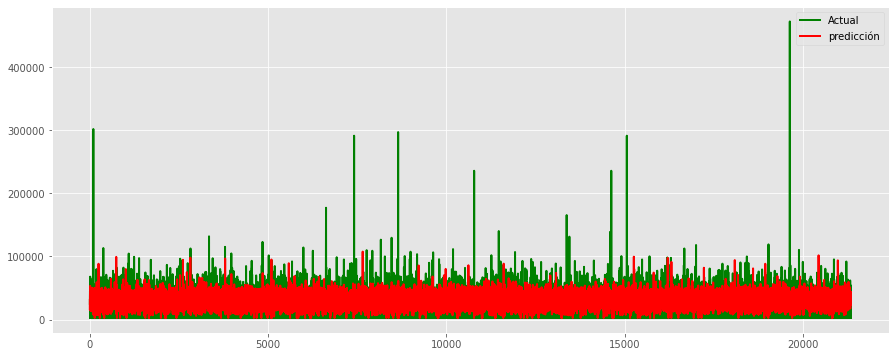

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="g", label="Actual", linewidth=2)
plt.plot(y_pred_knn, c="r", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

Parece que el Modelo KNN se ajusto bien, los valores pronosticados siguen los valores reales 

Finalmente, evaluaré el modelo con diferentes tipos de metricas en el conjunto de prueba (línea de base contra la extrapolación):

### **3.7 Tipos de Metricas**

Una vez que haya entrenado un modelo y haya hecho predicciones en el conjunto de prueba, el siguiente paso es saber qué tan bien se ha desempeñado su modelo para hacer predicciones en el conjunto de prueba desconocido. Hay varias métricas para comprobarlo. Sin embargo, el error absoluto medio, el error cuadrático medio y el error cuadrático medio medio son tres de las métricas más comunes.

**Error absoluto medio(Mean Absolute Error MAE)**

El error absoluto medio (MAE) se calcula tomando el promedio del error absoluto obtenido al restar los valores reales de los valores predichos. La ecuación para calcular MAE es:

$$MAE=\frac{\Sigma_{i=1}^{n} |y_i-\hat{y}|}{n} $$

**Error medio cuadrado (Mean Squared Error MSE)**

El error cuadrático medio (MSE) es similar al MAE. Sin embargo, el error para cada registro se eleva al cuadrado en el caso de MSE para castigar los registros de datos con una gran diferencia entre los valores predichos y reales. La ecuación para calcular el error cuadrático medio es la siguiente:

$$MSE=\frac{1}{2} \Sigma_{i=1}^{n} (y_i-\hat{y})^2 $$

**Root Mean Squared Error**

El error cuadrático medio es simplemente la raíz inferior del error cuadrático medio y se puede calcular de la siguiente manera:

$$RMSE=\sqrt{\frac{1}{n} \Sigma_{i=1}^{n} (y_i-\hat{y})^2  } $$

Los métodos utilizados para encontrar el valor de estas métricas están disponibles en la clase `sklearn.metrics`. Los valores predichos y reales deben pasarse a estos métodos, como se muestra en el resultado.

#### **3.7.1 CalculO de Metrica**

In [ ]:
# The mean squared error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_knn))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred_knn))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred_knn))

Mean Absolute Error: 12463.550250667666
Mean Squared Error: 296169101.3794143
Root Mean Squared Error: 17209.564241415712
Coefficient of determination: 0.01


Aquí está la salida. Al observar el error absoluto medio, se puede concluir que, en promedio, hay un error de 0,70 para las predicciones, lo que significa que, en promedio, los valores de propina predichos son 0,70 $ más o menos que los valores de propina reales.

### **3.8 Calculo de K-vecinos contra RMSE**

**Elegir un valor K**

Sigamos adelante y usemos el método del codo para elegir un buen valor $K$. Básicamente, comprobaremos la tasa de error de $k = 1$ para decir $k = 20$. Para cada valor de $k$ llamaremos al Regresor de  KNN y luego elegiremos el valor de $k$ que tenga la menor tasa de error.

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #para almacenar valores rmse para diferentes k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #hacer predicciones en el equipo de prueba
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('Valor de RMSE para k= ' , K , 'es:', error)

Valor de RMSE para k=  1 es: 21768.798823344932
Valor de RMSE para k=  2 es: 19099.159700579443
Valor de RMSE para k=  3 es: 18055.57812920024
Valor de RMSE para k=  4 es: 17516.17790121553
Valor de RMSE para k=  5 es: 17209.564241415712
Valor de RMSE para k=  6 es: 17047.970603752376
Valor de RMSE para k=  7 es: 16880.900100346877
Valor de RMSE para k=  8 es: 16762.21283212831
Valor de RMSE para k=  9 es: 16679.63293607908
Valor de RMSE para k=  10 es: 16641.495273871788
Valor de RMSE para k=  11 es: 16595.850099324358
Valor de RMSE para k=  12 es: 16546.279359046024
Valor de RMSE para k=  13 es: 16513.548654413422
Valor de RMSE para k=  14 es: 16483.009894423347
Valor de RMSE para k=  15 es: 16463.88989649589
Valor de RMSE para k=  16 es: 16444.631328505537
Valor de RMSE para k=  17 es: 16427.883606551295
Valor de RMSE para k=  18 es: 16420.13677930028
Valor de RMSE para k=  19 es: 16405.53834010159
Valor de RMSE para k=  20 es: 16387.1332926974


Text(0, 0.5, 'Error Rate')

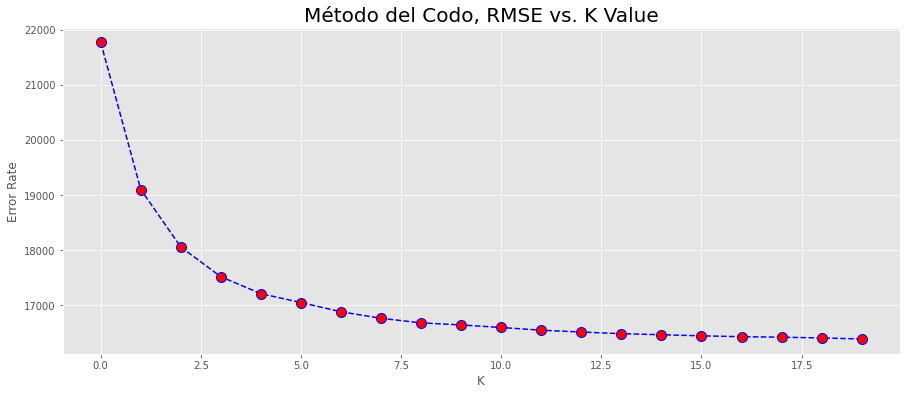

In [ ]:
plt.style.use('ggplot')

plt.figure(figsize=(15,6))
plt.plot(rmse_val ,color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title('Método del Codo, RMSE vs. K Value', size=20)
plt.xlabel('K')
plt.ylabel('Error Rate')

Como comentamos, cuando tomamos $k = 1$, obtenemos un valor **RMSE** relativamente alto. El valor de RMSE disminuye a medida que aumentamos el valor de $k$. En $k = 8$, el RMSE es aproximadamente 0.9910 y se dispara al aumentar aún más el valor de $k$. Podemos decir con seguridad que $k = 10$ nos dará el mejor resultado en este caso.

**Recursos adicional**

In [ ]:
#@
%%html
<b style="font-size:25px">Modelo KNN para Regresión con Python</b>
<hr>
<br>
<iframe width="876" height="417" src="https://www.youtube.com/embed/JtYCrzGdRLo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>